# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

Дедлайн на -3 балла к итоговой оценке: **17.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.


**Оценка**: 10/12 (не сделана регуляризация и доп метод спуска) - 3 за опоздание

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    Q: \mathbb{R}^d \to \mathbb{R} \\
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^\top \left( y - Xw \right) = \frac{1}{l}||y - Xw||_2^2 \\
    d||A||_2^2 = 2A^\top dA \\
    dQ = \frac{2}{l}(y - Xw)^\top (-X)dw = \frac{2}{l}(-X^\top (y - Xw))^\top dw \\
    \nabla_w Q = -\frac{2}{l}(X^\top (y - Xw))
$$


### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

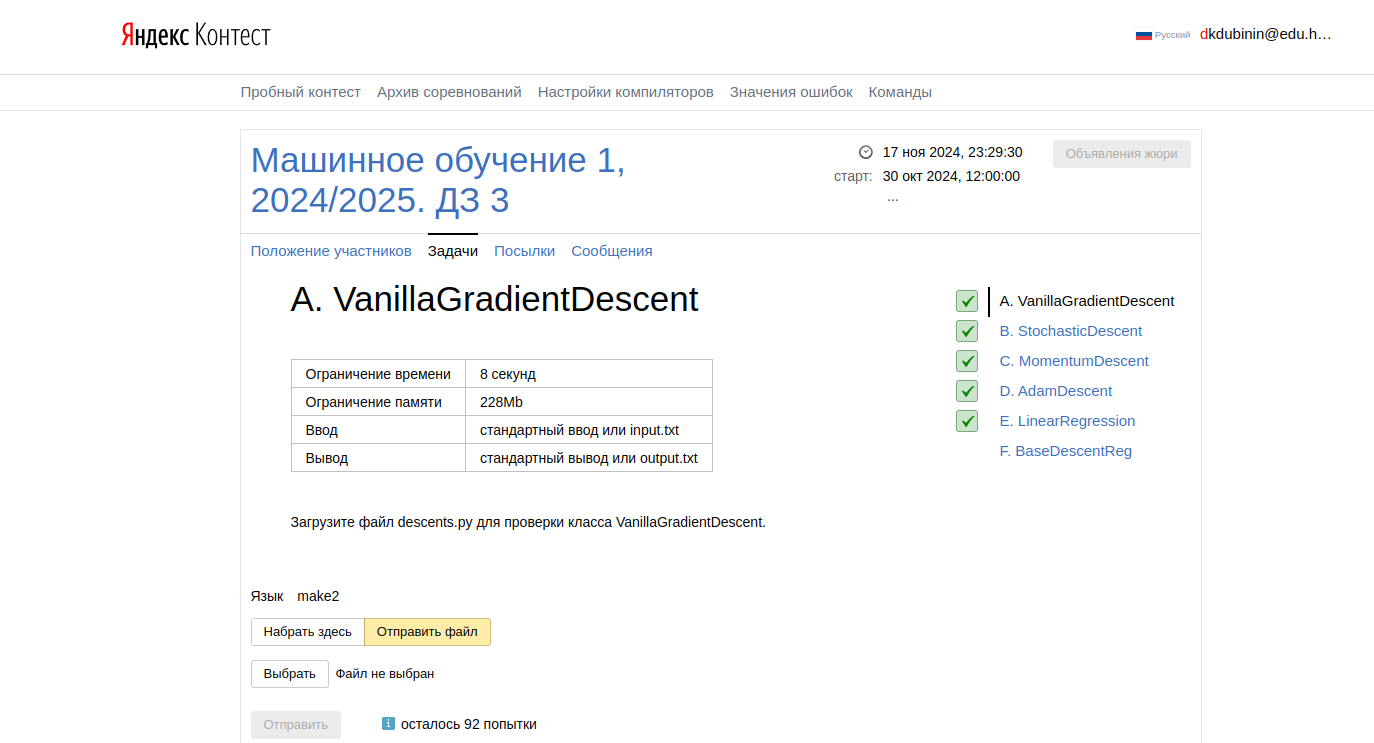

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

### 4.1 Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

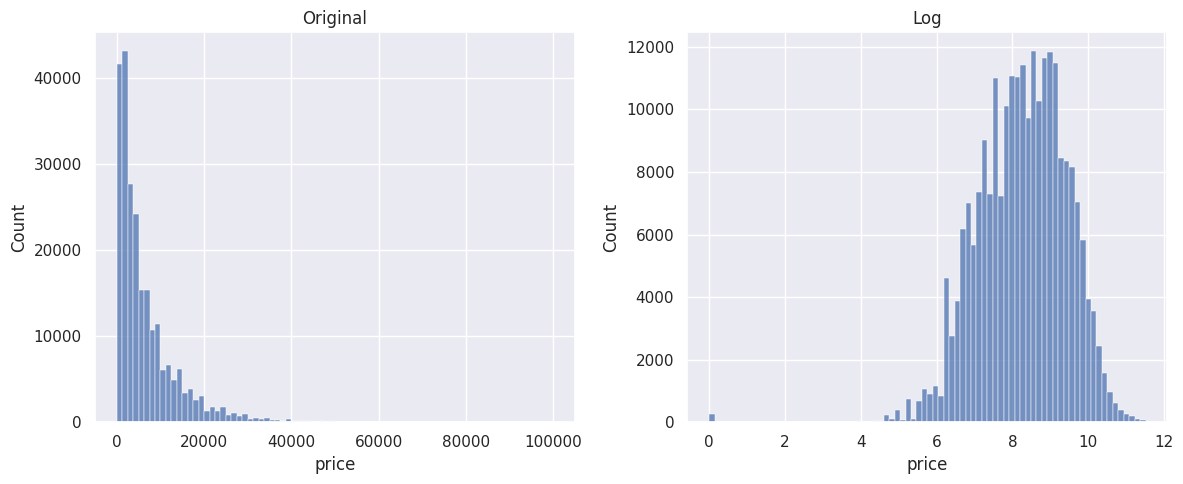

In [9]:
target = data['price']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(target, bins=80, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(np.log(target), bins=80, ax=axes[1])
axes[1].set_title('Log')

plt.tight_layout()
plt.show()

Получается, что лучше заменить, так как логарифм распределен гораздо ближе к нормальному. Какой-то менький выброс есть.

In [10]:
data['log_price'] = np.log(data['price'])
data.drop(columns='price', inplace=True)
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,7.600902
...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,8.974618
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,8.070906
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,7.089243
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9.126959


In [11]:
data.sort_values(by='log_price').head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
228312,toyota,avensis,limousine,manuell,diesel,nein,115,125000,191,0.0
132910,mercedes_benz,m_klasse,suv,automatik,lpg,ja,274,150000,192,0.0
73494,renault,scenic,bus,manuell,diesel,nein,82,150000,132,0.0
21336,volkswagen,polo,kleinwagen,manuell,benzin,ja,60,150000,190,0.0
132846,ford,fiesta,kleinwagen,manuell,benzin,ja,62,150000,199,0.0


Допустим, что машина должна стоить хотя бы 50 долларов.

<Axes: xlabel='log_price', ylabel='Count'>

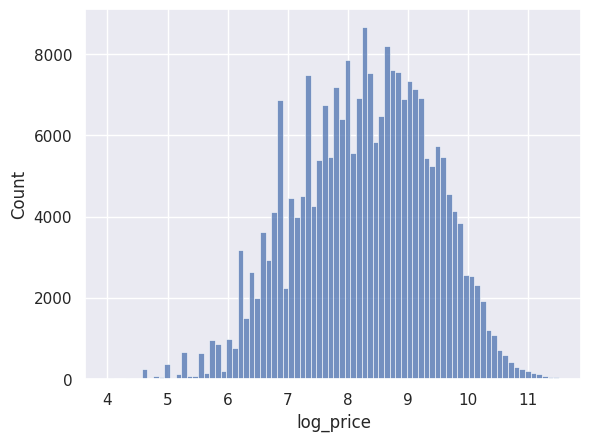

In [12]:
data = data[data['log_price'] > np.log(50)]
sns.histplot(data['log_price'], bins=80)

### 4.2 Проведите исследование данных:

* Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
* Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
* Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
* Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.

In [13]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
log_price            float64
dtype: object

In [14]:
data

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,7.600902
...,...,...,...,...,...,...,...,...,...,...
241185,volkswagen,golf,limousine,manuell,diesel,nein,140,150000,69,8.974618
241186,seat,leon,limousine,manuell,benzin,ja,225,150000,142,8.070906
241187,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,192,7.089243
241188,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,241,9.126959


In [15]:
def analyze_feature(feature: str):
    sns.relplot(data, x=feature, y='log_price', kind='line', aspect=2)
    plt.xticks(rotation=90)
    plt.title('Relation plot')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.histplot(data[feature], bins=80)
    plt.title('Values distribution')
    plt.xticks(rotation=90)
    plt.show()


#### 4.1.1 Категориальные признаки

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


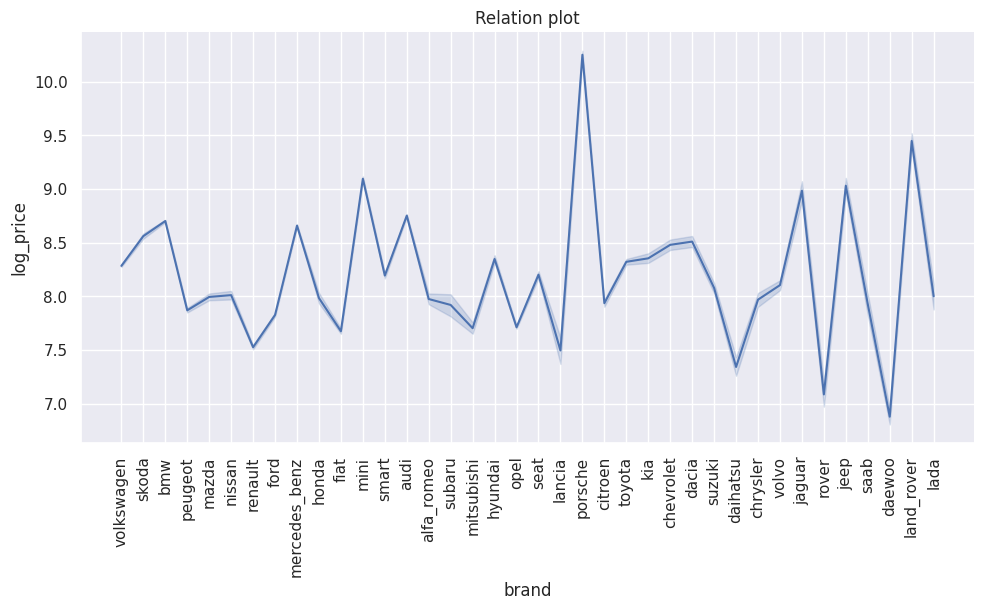

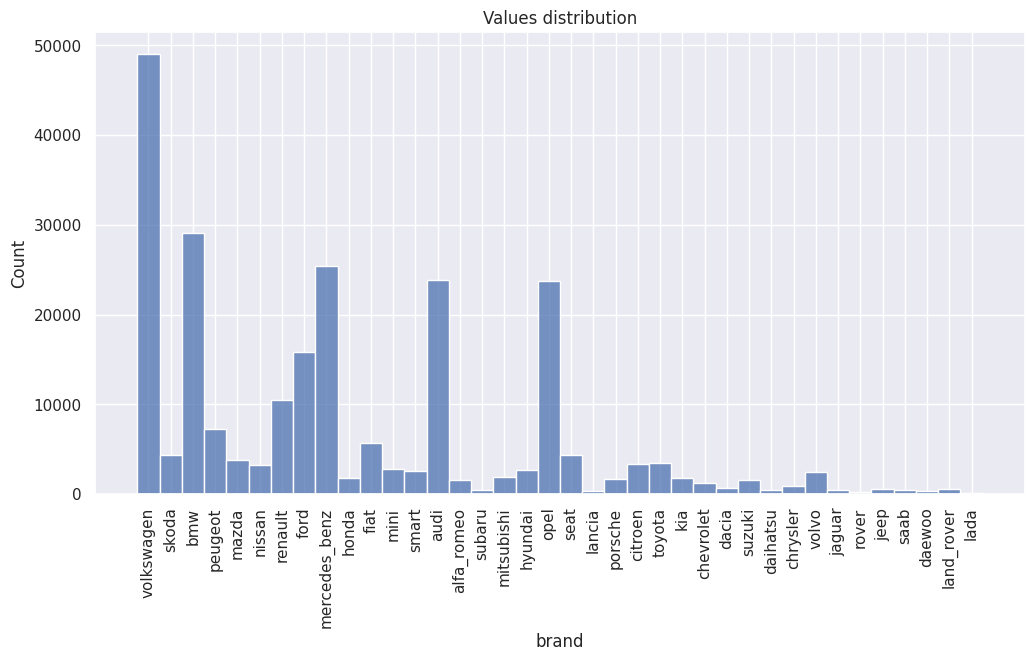

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


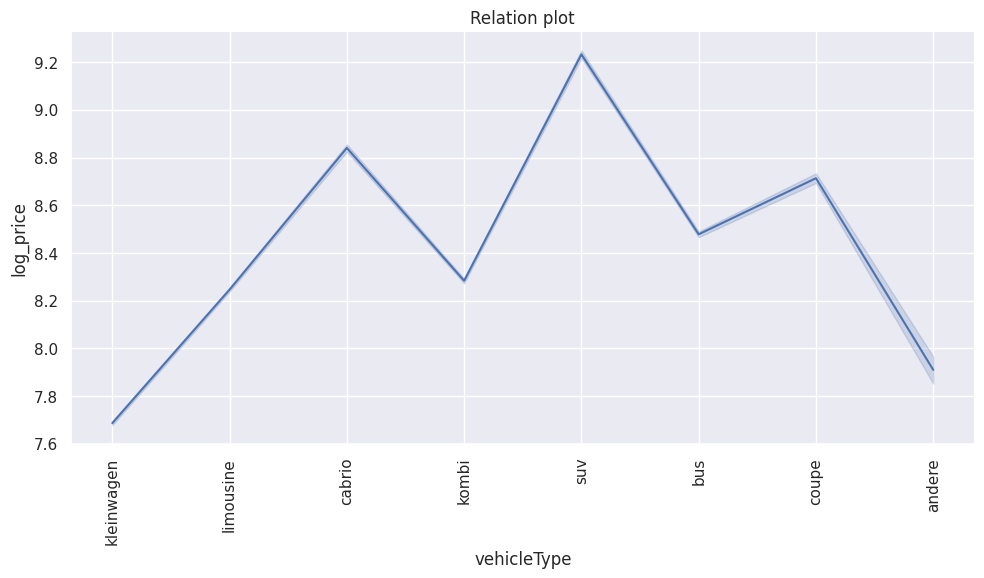

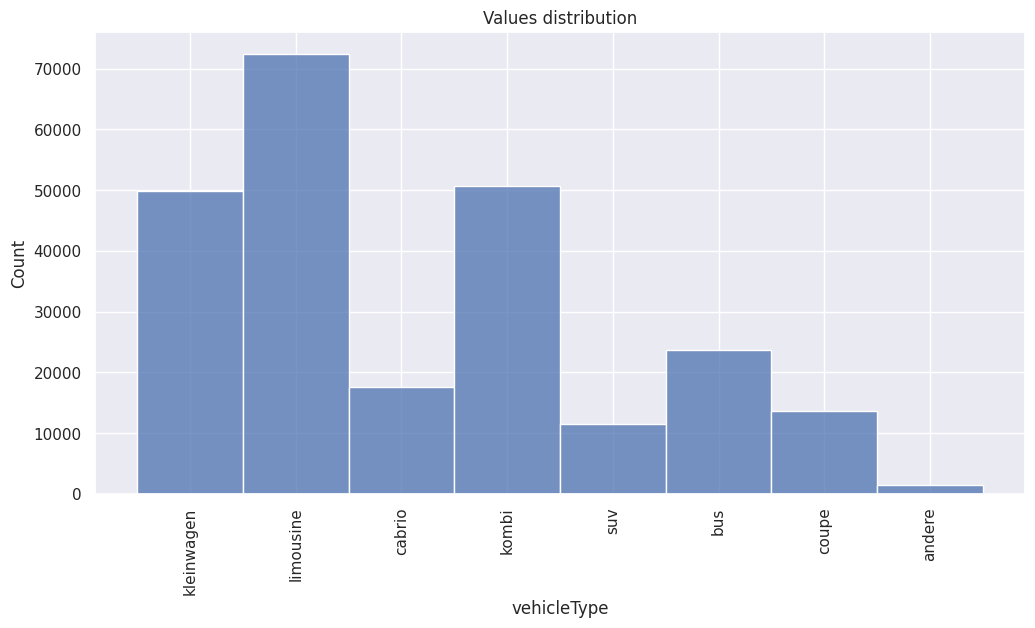

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


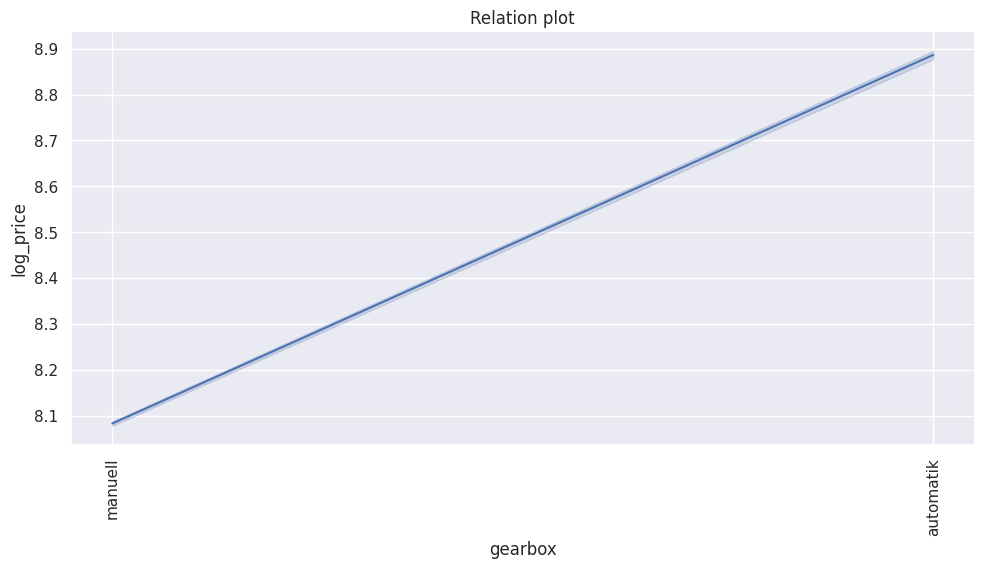

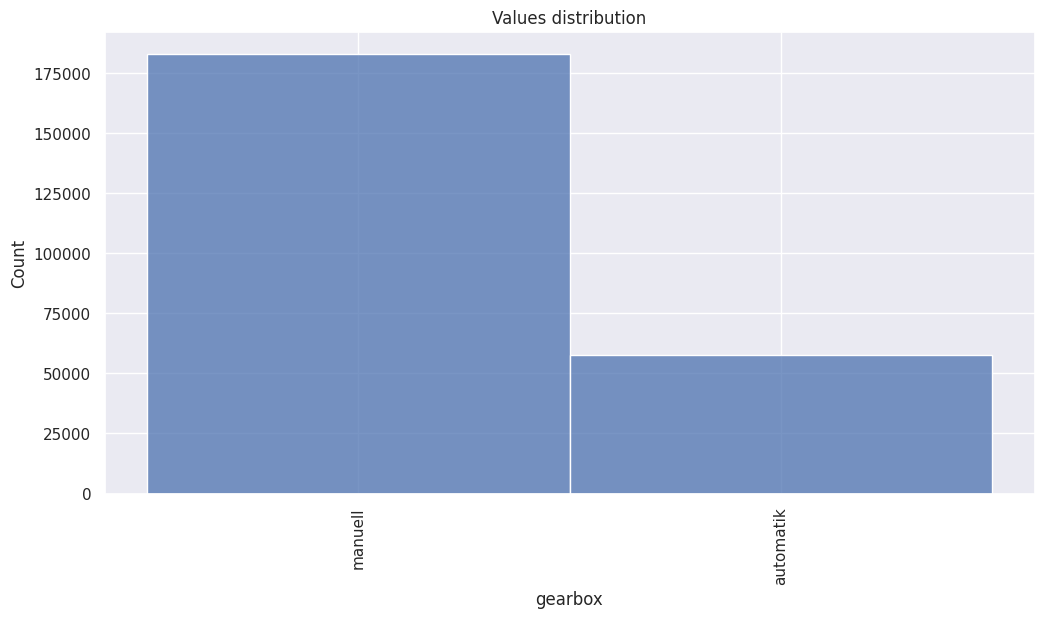

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


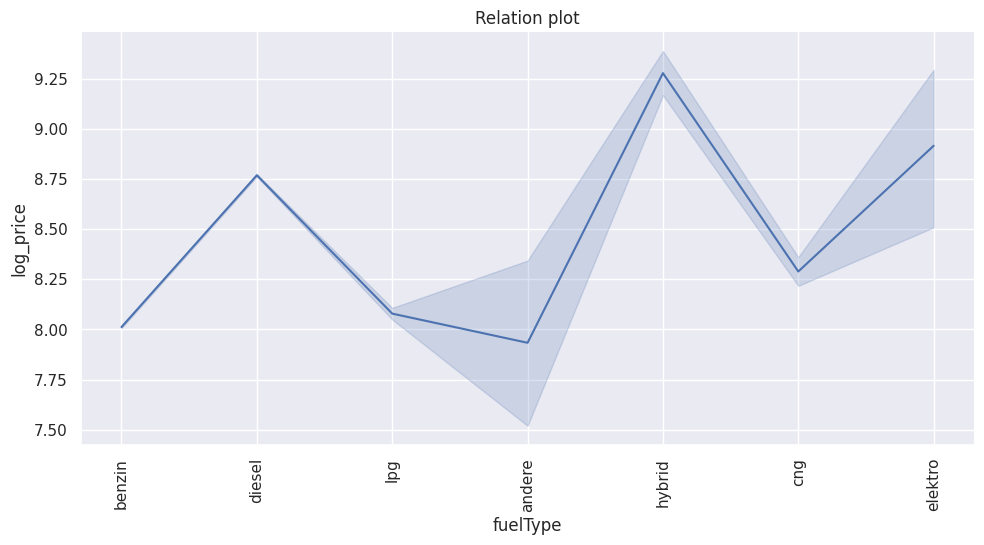

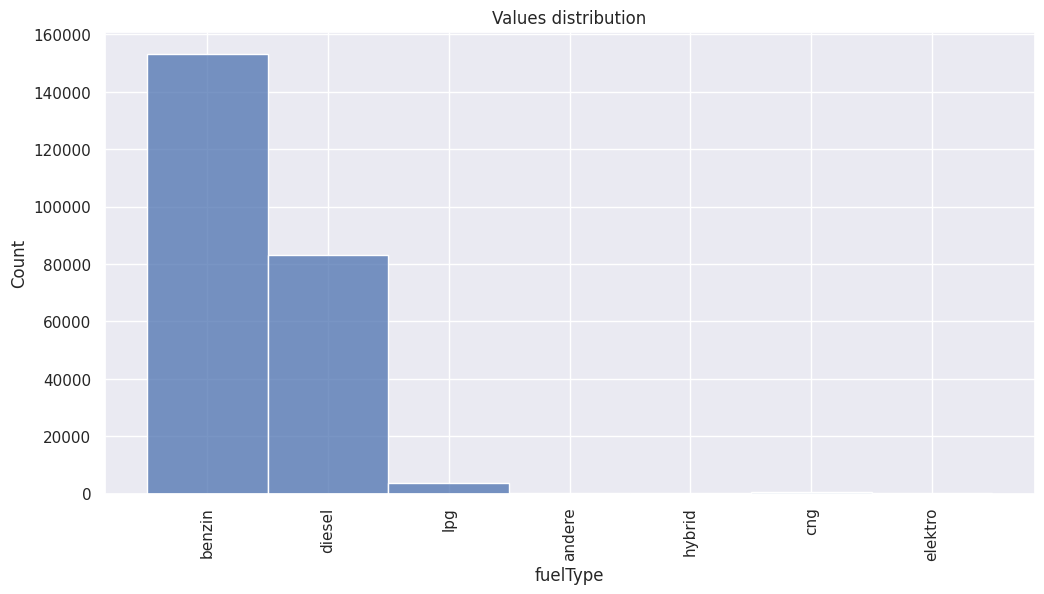

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


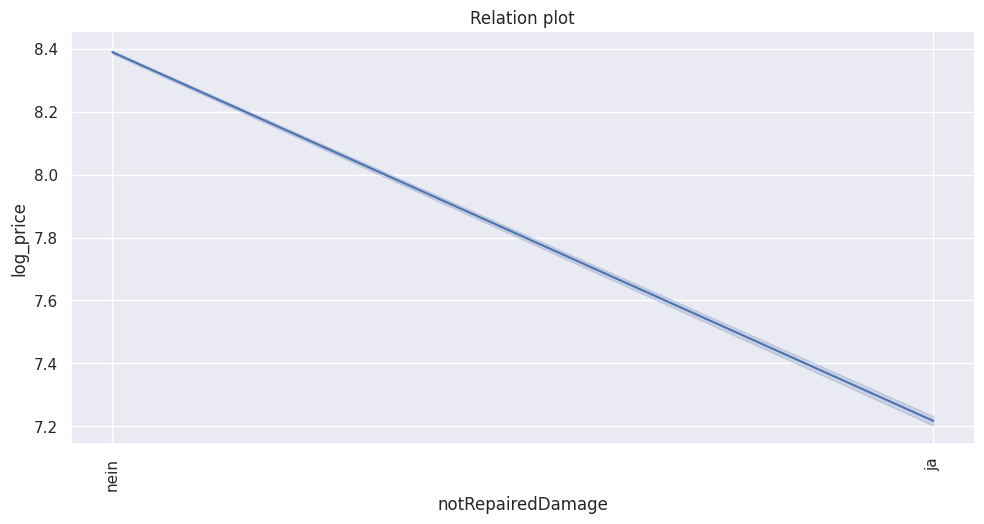

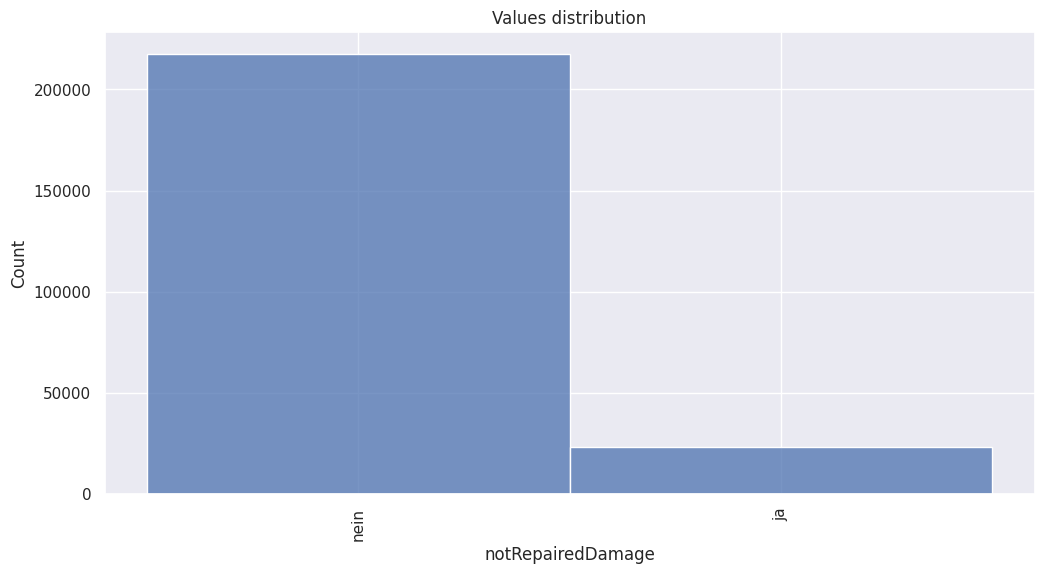

In [16]:
for feature in ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']:
    analyze_feature(feature)

In [17]:
# analyze_feature('model') # Так получится дизастер, потому что моделей слишком много. Твикнем код, чтобы мы анализировали топ 50 моделей

In [18]:
models = data['model'].value_counts()[:50]
data_cut = data.loc[data['model'].isin(models.index)]
data_cut.shape

(187298, 10)

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


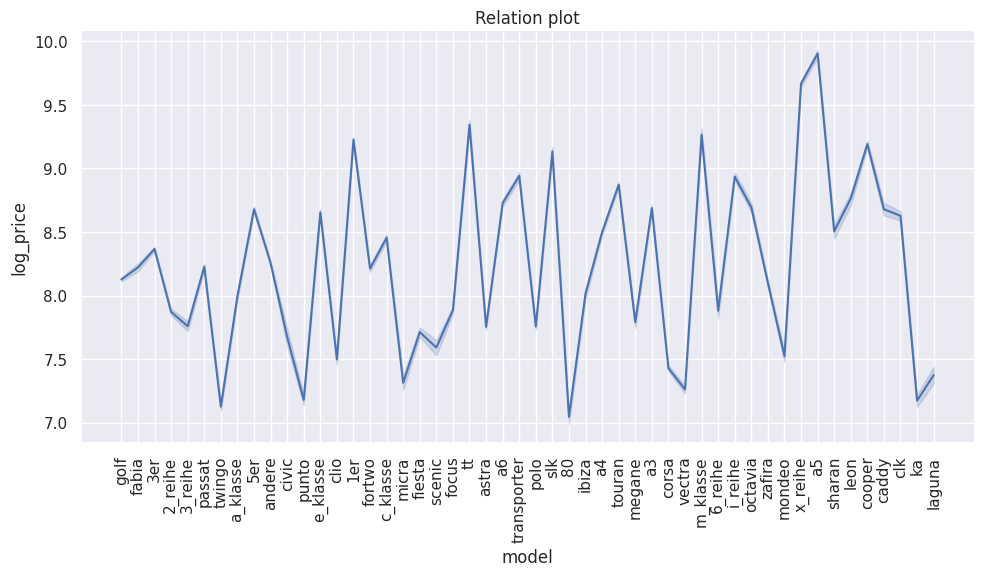

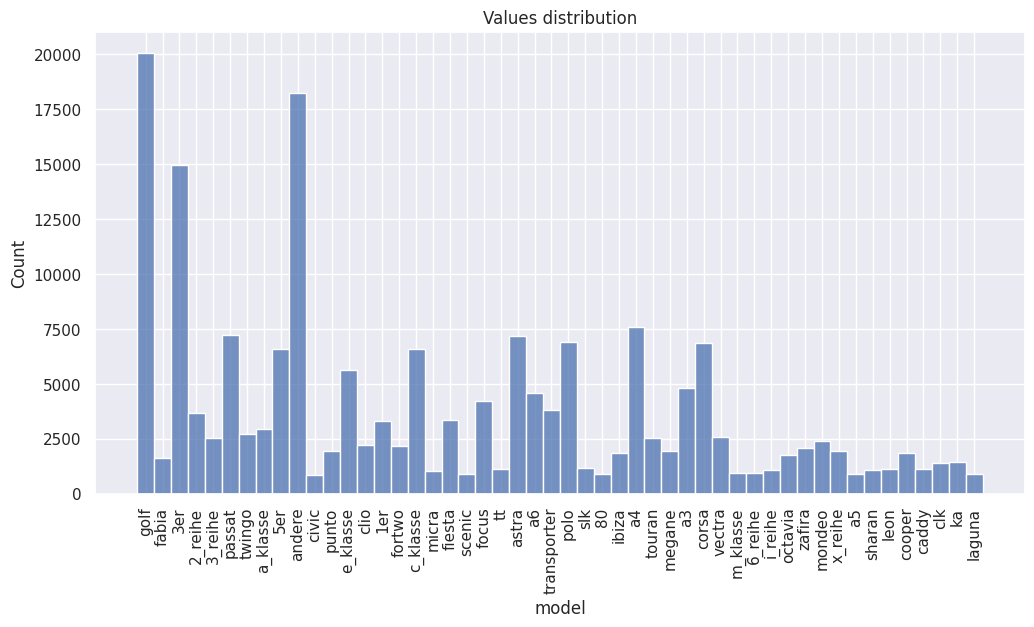

In [19]:
sns.relplot(data_cut, x='model', y='log_price', kind='line', aspect=2)
plt.xticks(rotation=90)
plt.title('Relation plot')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(data_cut['model'], bins=80)
plt.title('Values distribution')
plt.xticks(rotation=90)
plt.show()

Итоги: 
Бренд оставляем как есть и кодируем как категориальный признак.
Марку машины обрезаем до топ 50 и остальным дадим -1, чтобы не было проблем (переобучение, чрезмерное кол-во признаков).
Тип коробки передач, тип топлива и наличие поломок оставим как есть.

In [20]:
data.loc[-data['model'].isin(models.index), 'model'] = 'Other'

In [21]:
data['model'].value_counts()

model
Other          53531
golf           20045
andere         18238
3er            14951
a4              7579
passat          7223
astra           7161
polo            6906
corsa           6866
5er             6583
c_klasse        6581
e_klasse        5633
a3              4823
a6              4573
focus           4220
transporter     3805
2_reihe         3676
fiesta          3348
1er             3309
a_klasse        2936
twingo          2703
vectra          2559
touran          2523
3_reihe         2507
mondeo          2404
clio            2193
fortwo          2160
zafira          2060
x_reihe         1957
punto           1926
megane          1914
ibiza           1865
cooper          1844
octavia         1758
fabia           1632
ka              1434
clk             1404
slk             1160
tt              1133
caddy           1124
leon            1115
i_reihe         1088
sharan          1049
micra           1030
6_reihe          941
m_klasse         923
a5               906
laguna 

#### 4.1.2 Числовые признаки

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


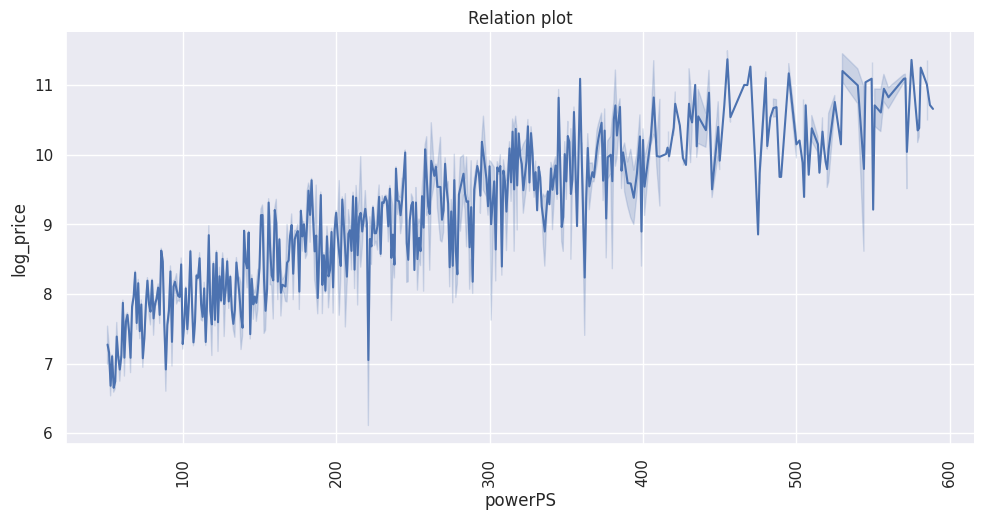

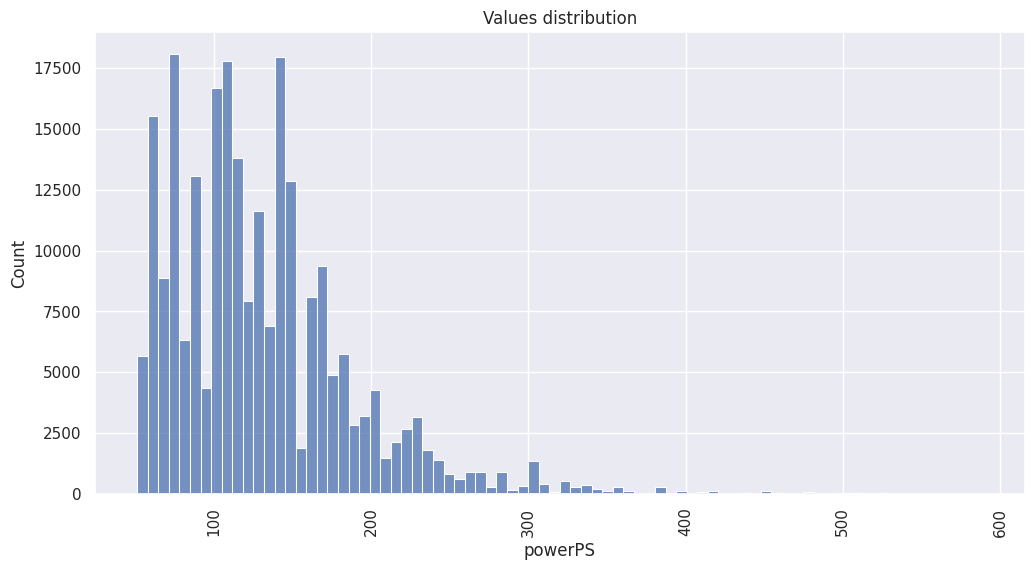

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


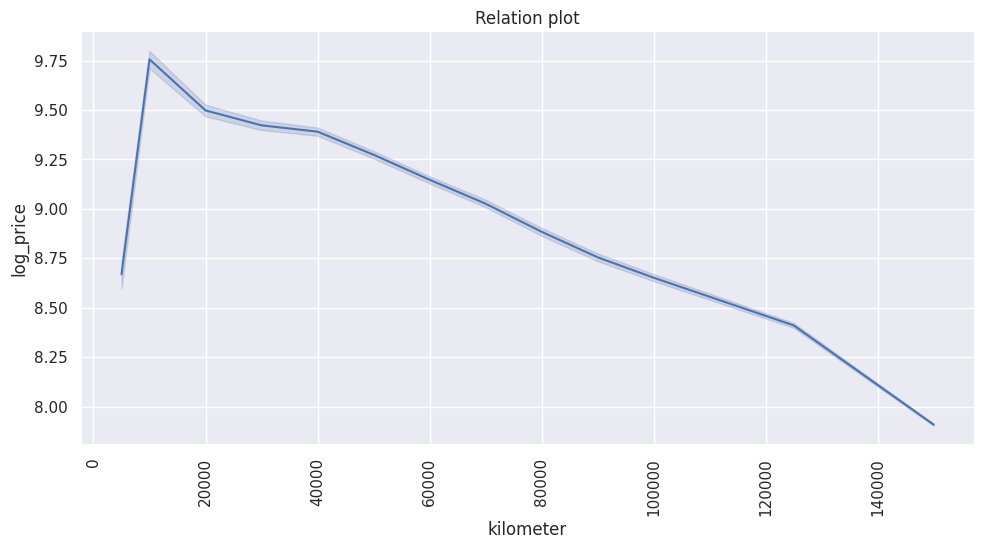

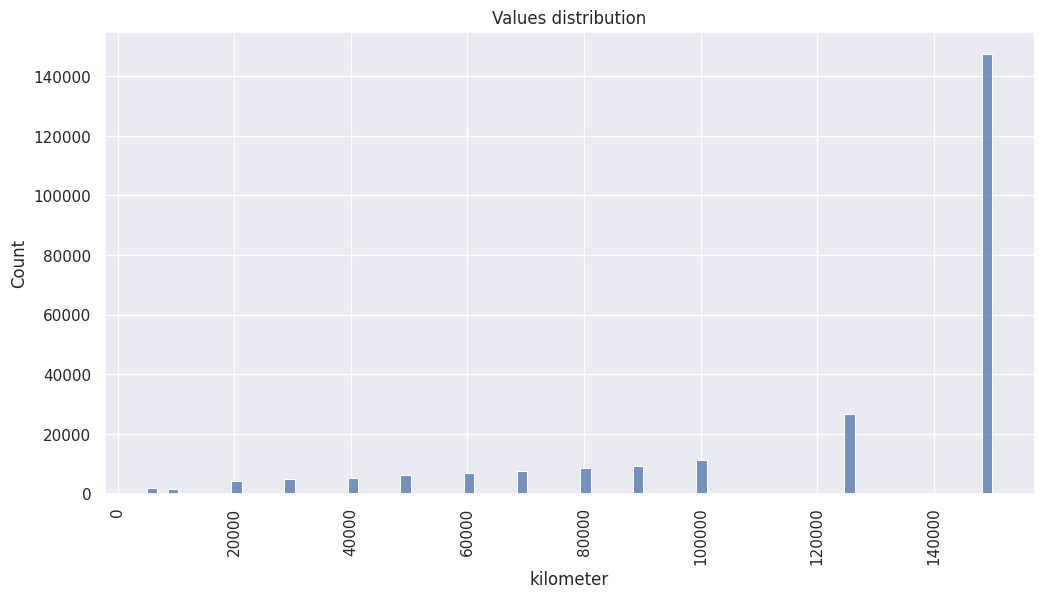

/home/sacr1ficerq/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


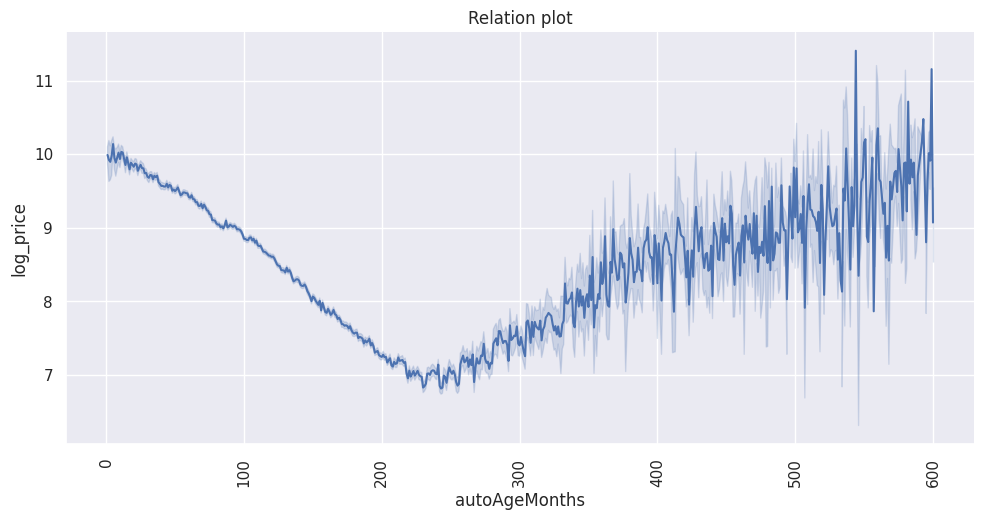

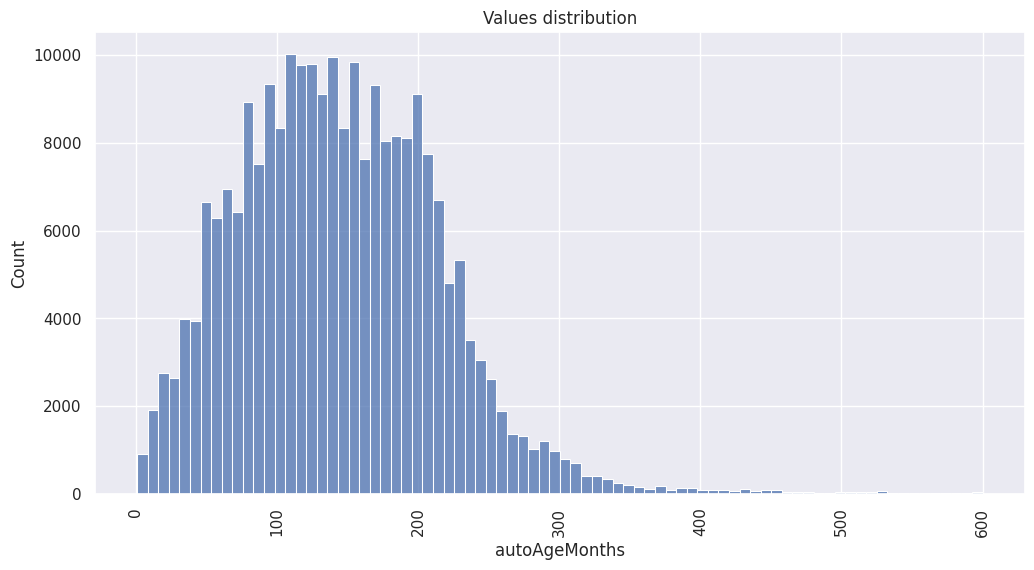

In [22]:
for feature in ['powerPS', 'kilometer', 'autoAgeMonths']:
    analyze_feature(feature)

##### Итоги:
Наверное что-то можно логарифмировать, или удалить какие-то выбросы, но если все оставить по виду сильно хуже не станет, а у меня кончается время.

### 4.2

In [23]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'model']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [24]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

/tmp/ipykernel_95209/3698194411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bias'] = 1


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [26]:
x.shape

(240829, 112)

In [27]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)
y_train, y_val, y_test = y_train.values, y_val.values, y_test.values

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [28]:
from sklearn.metrics import mean_squared_error as mse

def eval_lambda(descent_name, lambda_):
    cfg = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambda_}}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    if np.isnan(y_pred).any():
        return np.inf
    return mse(y_val, y_pred)

In [29]:
print(*np.round(np.logspace(-1, 0.5, 100), 2))

0.1 0.1 0.11 0.11 0.11 0.12 0.12 0.13 0.13 0.14 0.14 0.15 0.15 0.16 0.16 0.17 0.17 0.18 0.19 0.19 0.2 0.21 0.22 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.28 0.29 0.31 0.32 0.33 0.34 0.35 0.36 0.38 0.39 0.4 0.42 0.43 0.45 0.46 0.48 0.5 0.52 0.53 0.55 0.57 0.59 0.61 0.64 0.66 0.68 0.71 0.73 0.76 0.78 0.81 0.84 0.87 0.9 0.93 0.97 1.0 1.04 1.07 1.11 1.15 1.19 1.23 1.28 1.32 1.37 1.42 1.47 1.52 1.57 1.63 1.69 1.75 1.81 1.87 1.94 2.01 2.08 2.15 2.23 2.31 2.39 2.48 2.57 2.66 2.75 2.85 2.95 3.05 3.16


In [30]:
import warnings 
warnings.filterwarnings('ignore')

def pick_lambda(descent_name, lambdas):
    result = 1 # логичное дефолтное значение, так как это множитель
    min_mse = eval_lambda(descent_name, 1)

    for l in lambdas:
        loss = eval_lambda(descent_name, l)
        if loss < min_mse:
            min_mse = loss
            result = l
    print(min_mse)
    return result

lambdas = np.logspace(-1, 0.5, 100)
best_lambdas = {}

best_lambdas['full'] = pick_lambda('full', np.logspace(0, 0.5, 10))
best_lambdas['stochastic'] = pick_lambda('stochastic', np.logspace(3, 4, 10))
best_lambdas['momentum'] = pick_lambda('momentum', np.logspace(0, 0.5, 10))
best_lambdas['adam'] = pick_lambda('adam', np.logspace(0, 0.5, 10))

print('(method, best lambda):')
print(*best_lambdas.items(), sep='\n')

0.3183052436696967
0.351474607673679
0.3001433497452731
0.29129510374933176
(method, best lambda):
('full', 1.8957356524063758)
('stochastic', 1668.100537200059)
('momentum', 1.0)
('adam', 2.448436746822227)


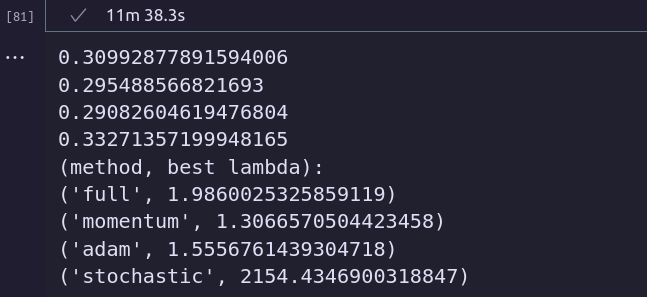

In [31]:
from sklearn.metrics import r2_score

loss_histories = {}

for descent_name, best_lambda in best_lambdas.items():
    cfg = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambda}}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    loss_histories[descent_name] = model.loss_history

    print(f'{descent_name}:')
    print(f'Train MSE: {mse(model.predict(X_train), y_train): 0.2f}, Test MSE: {mse(model.predict(X_test), y_test): 0.2f}')
    print(f'Train R2: {r2_score(model.predict(X_train), y_train): 0.2f}, Test R2: {r2_score(model.predict(X_test), y_test): 0.2f}')
    print(f'Iterations to converge: {model.descent.lr.iteration}')
    print()

full:
Train MSE:  0.31, Test MSE:  0.30
Train R2:  0.67, Test R2:  0.68
Iterations to converge: 98

stochastic:
Train MSE:  0.34, Test MSE:  0.33
Train R2:  0.67, Test R2:  0.68
Iterations to converge: 237

momentum:
Train MSE:  0.30, Test MSE:  0.29
Train R2:  0.68, Test R2:  0.69
Iterations to converge: 109

adam:
Train MSE:  0.29, Test MSE:  0.28
Train R2:  0.70, Test R2:  0.71
Iterations to converge: 98



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [32]:
tmp = []
for descent_name, loss_history in loss_histories.items():
    for iter_number, mse_ in enumerate(loss_history):
        tmp.append([descent_name, iter_number, mse_])

df = pd.DataFrame(tmp, columns=['descent_name', 'iteration', 'mse'])
df.groupby('descent_name')[['mse', 'iteration']].min()

,mse,iteration
descent_name,,
adam,0.289203,0
full,0.312449,0
momentum,0.292095,0
stochastic,0.341303,0


In [33]:
df

,descent_name,iteration,mse
0,full,0,1.917891e+01
1,full,1,1.122684e+03
2,full,2,4.636796e+04
3,full,3,1.380550e+06
4,full,4,3.151494e+07
...,...,...,...
541,adam,94,2.892028e-01
542,adam,95,2.892557e-01
543,adam,96,2.893869e-01
544,adam,97,2.894894e-01


In [34]:
df['log_mse'] = np.log(df['mse'])

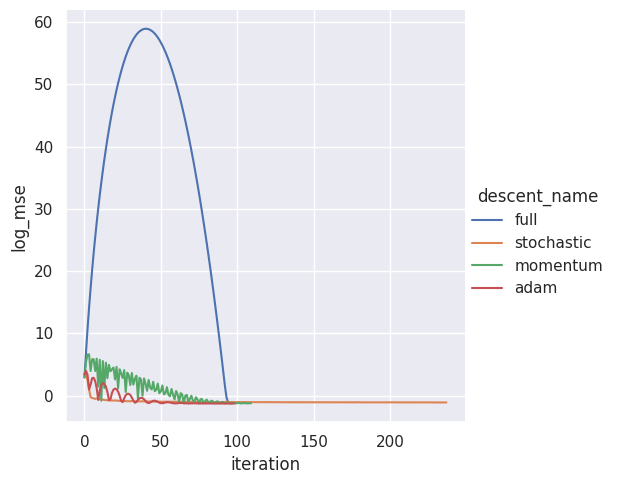

In [35]:
# sns.relplot(data=df.loc[-(df['descent_name']=='full')], x='iteration', y='log_mse', hue='descent_name', kind='line')
sns.relplot(data=df, x='iteration', y='log_mse', hue='descent_name', kind='line')

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [64]:
import time
batch_sizes = np.arange(5, 500, 10)

steps = {}
timers = {}

cfg = {'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 2154.43, # best lambda
        'loss_function': LossFunction.MSE
    }
}
cur_steps = np.zeros(5)
cur_timers = np.zeros(5)
for size in batch_sizes:
    for i in range(5):
        cfg['kwargs']['batch_size'] = size
        model = LinearRegression(descent_config=cfg)

        start = time.time()
        # model.fit(X_train, y_train)
        model.fit(X_val, y_val) # для экономии времени
        tm = time.time() - start

        cur_steps[i] = model.descent.lr.iteration
        cur_timers[i] = tm
    
    steps[size] = np.mean(cur_steps)
    timers[size] = np.mean(cur_timers)

In [65]:
steps

{5: 268.6,
 15: 300.0,
 25: 300.0,
 35: 300.0,
 45: 300.0,
 55: 300.0,
 65: 300.0,
 75: 300.0,
 85: 300.0,
 95: 300.0,
 105: 300.0,
 115: 300.0,
 125: 300.0,
 135: 300.0,
 145: 300.0,
 155: 300.0,
 165: 300.0,
 175: 300.0,
 185: 300.0,
 195: 291.0,
 205: 283.2,
 215: 276.0,
 225: 269.8,
 235: 264.0,
 245: 259.0,
 255: 254.0,
 265: 249.2,
 275: 245.2,
 285: 241.8,
 295: 238.0,
 305: 235.0,
 315: 232.0,
 325: 229.0,
 335: 226.0,
 345: 223.4,
 355: 221.0,
 365: 219.0,
 375: 216.2,
 385: 214.2,
 395: 212.2,
 405: 211.0,
 415: 209.0,
 425: 207.0,
 435: 205.0,
 445: 204.0,
 455: 202.0,
 465: 201.0,
 475: 199.0,
 485: 198.0,
 495: 197.0}

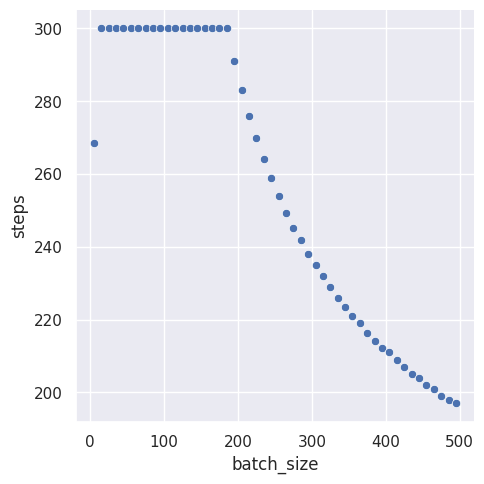

In [66]:
df = pd.DataFrame.from_dict({'steps': steps.values(), 'batch_size': steps.keys()})
sns.relplot(df, x='batch_size', y='steps')
# df

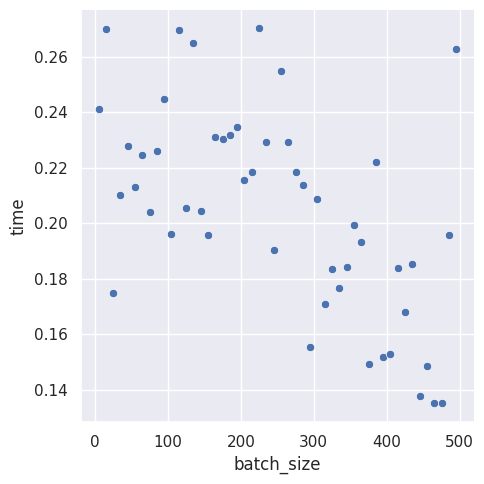

In [67]:
df = pd.DataFrame.from_dict({'time': timers.values(), 'batch_size': timers.keys()})
sns.relplot(df, x='batch_size', y='time')

Как мы можем видеть, для маленького батч сайза мы даже не успеваем обучится за максимальное кол-во итераций. Дальшеше с увеличением батч сайза, кол-во итераций уменьшается, но время обучения растет, и мы плавно перетекаем к обычному градиентному спуску.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

$$

    L(y, Xw)=\log\left(\cosh(Xw - y)\right) \\

    dL = \frac{1}{\cosh(Xw - y)} \cdot \sinh(Xw - y) \cdot d(Xw - y)\\

    dL = \frac{1}{\cosh(Xw - y)} \cdot \sinh(Xw - y) \cdot X \\

    dL = \tanh(Xw - y) X \\
    \nabla_w L(y, Xw) = X^T \tanh(Xw - y)

$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [69]:
def lcosh(y, y_pred):
    error = y - y_pred
    return np.mean(np.log((np.exp(error) + np.exp(-error))/2), axis=-1)

In [70]:
from descents import LossFunction
def eval_lambda(descent_name, lambda_):
    cfg = {'descent_name': descent_name, 
    'kwargs': {
        'dimension': X_train.shape[1], 
        'lambda_': lambda_,
        'loss_function': LossFunction.LogCosh,
        }}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    if np.isnan(y_pred).any():
        return np.inf
    return lcosh(y_val, y_pred)

In [71]:
import warnings 
warnings.filterwarnings('ignore')

def pick_lambda(descent_name, lambdas):
    result = 1 # логичное дефолтное значение, так как это множитель
    min_lcosh = eval_lambda(descent_name, 1)

    for l in lambdas:
        loss = eval_lambda(descent_name, l)
        if loss < min_lcosh:
            min_lcosh = loss
            result = l
    print(min_lcosh)
    return result

lambdas = np.logspace(-1, 0.5, 100)
best_lambdas = {}

best_lambdas['full'] = pick_lambda('full', np.logspace(0, 0.5, 10))
best_lambdas['stochastic'] = pick_lambda('stochastic', np.logspace(3, 4, 10))
best_lambdas['momentum'] = pick_lambda('momentum', np.logspace(0, 0.5, 10))
best_lambdas['adam'] = pick_lambda('adam', np.logspace(0, 0.5, 10))


print('(method, best lambda):')
print(*best_lambdas.items(), sep='\n')

0.13531293630655128
0.12100248609138956
0.11431284073197635
0.1117099314403933
(method, best lambda):
('full', 3.1622776601683795)
('stochastic', 10000.0)
('momentum', 2.7825594022071245)
('adam', 3.1622776601683795)


In [72]:
loss_histories = {}

for descent_name, best_lambda in best_lambdas.items():
    cfg = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambda, 'loss_function': LossFunction.LogCosh}}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    loss_histories[descent_name] = model.loss_history

    print(f'{descent_name}:')
    print(f'Train Log-Cosh: {lcosh(model.predict(X_train), y_train): 0.2f}, Test Log-Cosh: {lcosh(model.predict(X_test), y_test): 0.2f}')
    print(f'Train R2: {r2_score(model.predict(X_train), y_train): 0.2f}, Test R2: {r2_score(model.predict(X_test), y_test): 0.2f}')
    print(f'Iterations to converge: {model.descent.lr.iteration}')
    print()

full:
Train Log-Cosh:  0.13, Test Log-Cosh:  0.13
Train R2:  0.66, Test R2:  0.67
Iterations to converge: 54

stochastic:
Train Log-Cosh:  0.12, Test Log-Cosh:  0.12
Train R2:  0.68, Test R2:  0.69
Iterations to converge: 300

momentum:
Train Log-Cosh:  0.11, Test Log-Cosh:  0.11
Train R2:  0.70, Test R2:  0.71
Iterations to converge: 98

adam:
Train Log-Cosh:  0.11, Test Log-Cosh:  0.11
Train R2:  0.71, Test R2:  0.72
Iterations to converge: 114



### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

У меня нет друзей и я не умею готовить((


Но есть собутыльник с ПАДа, вот фотография того как я делюсь с ним самым важным в жизни - теплотой и хорошим настроение


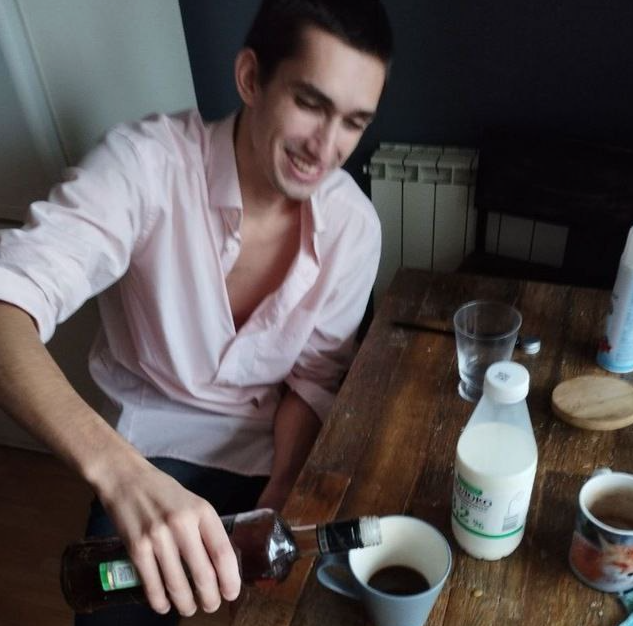

Ну такой вот примерно рецепт усредненный, потому что вариаций масса. Берется кофе, в него заливается Баркарди. Фсё.

### Бонус. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

MAE:
$$L(y, X_iw) = \frac{1}{l}\sum_{i=1}^l|y_i - X_iw_i| \\
dL(y, X_iw) = \frac{1}{l}\sum_{i=1}^l\frac{y_i - X_iw_i}{|y_i - X_iw_i|} \\
\nabla_w L = \frac{1}{l}\sum_{i=1}^l\frac{y_i - X_iw_i}{|y_i - X_iw_i|} (-X_i)
$$

Huber:
$$L(y, Xw) = \frac{1}{l}\sum_{i=1}^l\begin{cases} \\
(y_i - X_iw_i)^2, & |y_i - X_iw_i| \leq \delta \\
2\delta|y_i - X_iw_i| - \delta^2, & |y_i - X_iw_i| > \delta \\
\end{cases} \\
dL(y, Xw) = \frac{1}{l}\sum_{i=1}^l\begin{cases} \\
2(y_i - X_iw_i), & |y_i - X_iw_i| \leq \delta \\
2\delta\frac{y_i - X_iw_i}{|y_i - X_iw_i|}, & |y_i - X_iw_i| > \delta \\
\end{cases} \\
\nabla_w L = \frac{1}{l}\sum_{i=1}^l\begin{cases} \\
2(y_i - X_iw_i) (-X_i), & |y_i - X_iw_i| \leq \delta \\
2\delta\frac{y_i - X_iw_i}{|y_i - X_iw_i|} (-X_i), & |y_i - X_iw_i| > \delta \\
\end{cases}
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [74]:
def mae(y, y_pred):
    error = y - y_pred
    return np.mean(np.abs(error))

In [75]:
from descents import LossFunction
def eval_lambda(descent_name, lambda_):
    cfg = {'descent_name': descent_name, 
    'kwargs': {
        'dimension': X_train.shape[1], 
        'lambda_': lambda_,
        'loss_function': LossFunction.LogCosh,
        }}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    if np.isnan(y_pred).any():
        return np.inf
    return mae(y_val, y_pred)

In [76]:
import warnings 
warnings.filterwarnings('ignore')

def pick_lambda(descent_name, lambdas):
    result = 1 # логичное дефолтное значение, так как это множитель
    min_mae = eval_lambda(descent_name, 1)

    for l in lambdas:
        loss = eval_lambda(descent_name, l)
        if loss < min_mae:
            min_mae = loss
            result = l
    print(min_mae)
    return result

lambdas = np.logspace(-1, 0.5, 100)
best_lambdas = {}

best_lambdas['full'] = pick_lambda('full', np.logspace(0, 0.5, 10))
best_lambdas['stochastic'] = pick_lambda('stochastic', np.logspace(3, 4, 10))
best_lambdas['momentum'] = pick_lambda('momentum', np.logspace(0, 0.5, 10))
best_lambdas['adam'] = pick_lambda('adam', np.logspace(0, 0.5, 10))


print('(method, best lambda):')
print(*best_lambdas.items(), sep='\n')

0.40713136471750705
0.38175928096662465
0.35988183595017853
0.357114459690938
(method, best lambda):
('full', 3.1622776601683795)
('stochastic', 10000.0)
('momentum', 3.1622776601683795)
('adam', 1.1364636663857248)


In [77]:

loss_histories = {}

for descent_name, best_lambda in best_lambdas.items():
    cfg = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambda, 'loss_function': LossFunction.LogCosh}}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    loss_histories[descent_name] = model.loss_history

    print(f'{descent_name}:')
    print(f'Train MAE: {mae(model.predict(X_train), y_train): 0.2f}, Test MAE: {mae(model.predict(X_test), y_test): 0.2f}')
    print(f'Train R2: {r2_score(model.predict(X_train), y_train): 0.2f}, Test R2: {r2_score(model.predict(X_test), y_test): 0.2f}')
    print(f'Iterations to converge: {model.descent.lr.iteration}')
    print()

full:
Train MAE:  0.41, Test MAE:  0.41
Train R2:  0.65, Test R2:  0.66
Iterations to converge: 67

stochastic:
Train MAE:  0.38, Test MAE:  0.37
Train R2:  0.69, Test R2:  0.70
Iterations to converge: 300

momentum:
Train MAE:  0.36, Test MAE:  0.35
Train R2:  0.70, Test R2:  0.71
Iterations to converge: 99

adam:
Train MAE:  0.36, Test MAE:  0.35
Train R2:  0.71, Test R2:  0.72
Iterations to converge: 87



In [78]:
def huber(y, y_pred, delta=1.0):
    error = y - y_pred
    return np.mean(
        np.where(
            np.abs(error) <= delta,
            (error**2) / 2,
            delta * (np.abs(error) - delta / 2)
        )
    )


In [79]:
from descents import LossFunction
def eval_lambda(descent_name, lambda_, delta=1.0):
    cfg = {'descent_name': descent_name, 
    'kwargs': {
        'dimension': X_train.shape[1], 
        'lambda_': lambda_,
        'loss_function': LossFunction.LogCosh,
        }}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    if np.isnan(y_pred).any():
        return np.inf
    return huber(y_val, y_pred, delta)

In [80]:
import warnings 
warnings.filterwarnings('ignore')

def pick_lambda(descent_name, lambdas, delta=1.0):
    result = 1 # логичное дефолтное значение, так как это множитель
    min_huber = eval_lambda(descent_name, 1, delta)

    for l in lambdas:
        loss = eval_lambda(descent_name, l, delta)
        if loss < min_huber:
            min_huber = loss
            result = l
    print(min_huber)
    return result

lambdas = np.logspace(-1, 0.5, 100)
best_lambdas = {}

best_lambdas['full'] = pick_lambda('full', np.logspace(0, 0.5, 10))
best_lambdas['stochastic'] = pick_lambda('stochastic', np.logspace(3, 4, 10))
best_lambdas['momentum'] = pick_lambda('momentum', np.logspace(0, 0.5, 10))
best_lambdas['adam'] = pick_lambda('adam', np.logspace(0, 0.5, 10))


print('(method, best lambda):')
print(*best_lambdas.items(), sep='\n')

0.14905441460476015
0.13609298562547115
0.1244197219673977
0.12196850660188273
(method, best lambda):
('full', 2.154434690031884)
('stochastic', 7742.63682681127)
('momentum', 2.7825594022071245)
('adam', 2.7825594022071245)


In [81]:

loss_histories = {}

for descent_name, best_lambda in best_lambdas.items():
    cfg = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': best_lambda, 'loss_function': LossFunction.LogCosh}}
    model = LinearRegression(descent_config=cfg)
    model.fit(X_train, y_train)

    loss_histories[descent_name] = model.loss_history

    print(f'{descent_name}:')
    print(f'Train Huber: {mae(model.predict(X_train), y_train): 0.2f}, Test Huber: {mae(model.predict(X_test), y_test): 0.2f}')
    print(f'Train R2: {r2_score(model.predict(X_train), y_train): 0.2f}, Test R2: {r2_score(model.predict(X_test), y_test): 0.2f}')
    print(f'Iterations to converge: {model.descent.lr.iteration}')
    print()

full:
Train Huber:  0.42, Test Huber:  0.42
Train R2:  0.65, Test R2:  0.66
Iterations to converge: 45

stochastic:
Train Huber:  0.39, Test Huber:  0.38
Train R2:  0.68, Test R2:  0.69
Iterations to converge: 300

momentum:
Train Huber:  0.36, Test Huber:  0.36
Train R2:  0.70, Test R2:  0.71
Iterations to converge: 99

adam:
Train Huber:  0.36, Test Huber:  0.35
Train R2:  0.72, Test R2:  0.73
Iterations to converge: 101



Пока что лучший коэффициент детерминации мы получили для для Адама с Хубер лосом. Это не может не радовать после стольких часов дебага. В целом практически все модели не сильно различимы между собой, но адам везде показывает себя лучше, что не удивительно, так как он совмещает все сильные стороны других методов.